# **Análisis predictivo**
Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

In [2]:
# carga de datos
import time
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

Cargamos todas las librerias necesarias para nuestro estudio

In [3]:
# machine learning
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.utils import resample,shuffle

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [4]:
!pip install nltk

In [5]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# **Carga de Datos**
En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab una vez listos desde la etapa anterior.

In [6]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/Terrorismo_limpio_analisis.xlsx")

In [7]:
data_1="Terrorismo_limpio_analisis"
df = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)

Se realiza un filtro para la región objeto de estudio

In [8]:
from numpy.core.multiarray import concatenate
d = df[df['región_txt']=='Sub-Saharan Africa']



In [9]:
d.drop(['país_txt','región_txt','tipodeataque_txt','tipoobjetivo','organizacion', 'tipoarmamento','motivo','sumario','ciudad', 'nacionalidadvictima'], axis=1, inplace = True)


Número de registros y columnas en el conjunto de datos.

In [10]:
# número de registros y columnas en el conjunto de datos
print("número de filas:",d.shape[0])
print("número de columnas:",d.shape[1])

número de filas: 21169
número de columnas: 20


Tpos de datos en cada columna

In [11]:
# tipo de datos en cada columna
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21169 entries, 2019 to 1986
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   mes                 21169 non-null  int64
 1   día                 21169 non-null  int64
 2   país                21169 non-null  int64
 3   latitud             21169 non-null  int64
 4   longitud            21169 non-null  int64
 5   crit                21169 non-null  int64
 6   multiple            21169 non-null  int64
 7   éxito               21169 non-null  int64
 8   suicidio            21169 non-null  int64
 9   tipodeataque        21169 non-null  int64
 10  tipoobjetivo_num    21169 non-null  int64
 11  organización_num    21169 non-null  int64
 12  autoría             21169 non-null  int64
 13  tipoarmamento_num   21169 non-null  int64
 14  muertos             21169 non-null  int64
 15  muertosterroristas  21169 non-null  int64
 16  heridos             21169 non-null  in

In [12]:
d.head(10)

,mes,día,país,latitud,longitud,crit,multiple,éxito,suicidio,tipodeataque,tipoobjetivo_num,organización_num,autoría,tipoarmamento_num,muertos,muertosterroristas,heridos,secuestrovictima,rescate,bajas
año,,,,,,,,,,,,,,,,,,,,
2019,3,12,39,3500307,46500956,1,0,1,0,7,13,23,1,5,3,0,0,1,0,3
2017,9,14,32,5113679,7334651,1,0,1,0,4,12,169,0,8,1,0,0,0,0,1
2006,1,23,11,386859,30222423,1,0,1,0,1,5,218,-9,5,23,15,0,0,0,1
2009,6,10,11,386859,30222423,1,0,1,0,1,13,218,0,13,9,0,0,1,0,9
2008,6,4,32,5116561,7367093,1,0,1,0,7,6,467,0,5,0,0,0,1,1,0
2010,8,2,32,5116561,7367093,1,0,1,0,1,9,467,0,5,1,1,3,0,0,4
2015,4,21,32,5110208,7406966,1,0,1,0,7,13,467,0,5,0,0,0,1,0,1
2014,11,2,32,875392,7964677,1,1,1,0,4,13,144,0,8,2,0,0,0,0,1
2012,6,4,39,7077222,47474167,1,0,1,0,1,13,467,0,5,4,0,5,0,0,9


Una vez que hemos eliminado los nulos, las variables missings y hemos seleccionados las variables objeto de estudio procedemos a realizar estadisticas genericas del conjunto de datos.

In [13]:
# Statistical analysis
d.describe()

,mes,día,país,latitud,longitud,crit,multiple,éxito,suicidio,tipodeataque,tipoobjetivo_num,organización_num,autoría,tipoarmamento_num,muertos,muertosterroristas,heridos,secuestrovictima,rescate,bajas
count,21169.000000,21169.000000,21169.000000,2.116900e+04,2.116900e+04,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000,21169.00000,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000,21169.000000
mean,6.439369,15.462705,30.175634,1.172127e+06,2.289430e+07,0.986206,0.194010,0.923237,0.042468,3.270112,10.50437,238.593084,0.092730,6.593037,4.162455,0.728046,2.752468,0.023289,-0.120837,5.928480
std,3.409936,8.827815,12.259799,1.174446e+07,1.651648e+07,0.116637,0.395446,0.266222,0.201659,2.537749,4.38342,189.534318,0.770934,2.560447,16.194844,5.789752,30.224159,1.070139,1.085509,36.234778
min,1.000000,0.000000,1.000000,-3.411532e+07,-1.736603e+07,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000
25%,4.000000,8.000000,27.000000,-3.363380e+05,8.594081e+06,1.000000,0.000000,1.000000,0.000000,1.000000,7.00000,33.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.000000,15.000000,32.000000,2.059819e+06,2.535008e+07,1.000000,0.000000,1.000000,0.000000,3.000000,12.00000,191.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,23.000000,39.000000,9.933333e+06,3.967761e+07,1.000000,0.000000,1.000000,0.000000,4.000000,13.00000,467.000000,0.000000,6.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000
max,12.000000,31.000000,49.000000,2.457738e+07,5.107731e+07,1.000000,1.000000,1.000000,1.000000,9.000000,21.00000,490.000000,1.000000,13.000000,1180.000000,250.000000,4000.000000,1.000000,1.000000,4224.000000


# Procedamos a realizar unas visualizaciones básicas


In [14]:
import os
os.getcwd()
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing
import os
%matplotlib inline
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
#import sklearn
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from subprocess import check_output

In [15]:
d.reset_index()

,año,mes,día,país,latitud,longitud,crit,multiple,éxito,suicidio,...,tipoobjetivo_num,organización_num,autoría,tipoarmamento_num,muertos,muertosterroristas,heridos,secuestrovictima,rescate,bajas
0,2019,3,12,39,3500307,46500956,1,0,1,0,...,13,23,1,5,3,0,0,1,0,3
1,2017,9,14,32,5113679,7334651,1,0,1,0,...,12,169,0,8,1,0,0,0,0,1
2,2006,1,23,11,386859,30222423,1,0,1,0,...,5,218,-9,5,23,15,0,0,0,1
3,2009,6,10,11,386859,30222423,1,0,1,0,...,13,218,0,13,9,0,0,1,0,9
4,2008,6,4,32,5116561,7367093,1,0,1,0,...,6,467,0,5,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,2016,8,19,32,10953937,10175996,1,1,1,0,...,13,467,0,5,0,0,0,1,0,1
21165,2014,4,3,32,127775,6783333,1,1,1,0,...,13,78,0,5,14,0,0,0,0,1
21166,2016,11,19,32,12784464,6784201,1,1,1,0,...,13,467,0,5,3,0,0,0,0,1
21167,2003,3,27,24,6064944,-8139318,1,0,1,0,...,5,467,-9,5,0,0,0,1,0,0


1    19544
0     1625
Name: éxito, dtype: int64

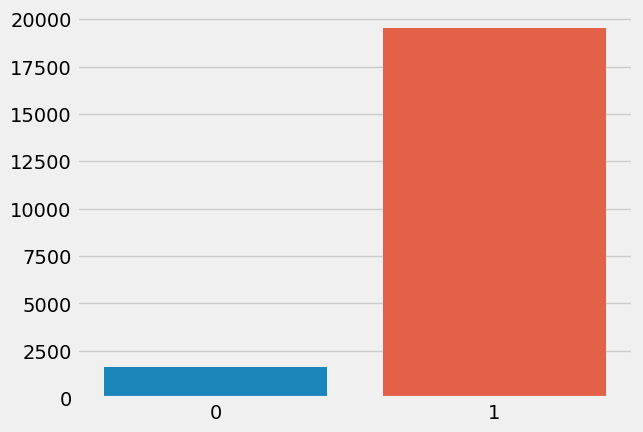

In [16]:
y = d.éxito.value_counts()
sns.barplot(x=y.index, y=y.values)
y

In [17]:
X = d.drop(['éxito'], axis=1, inplace=False)
X

,mes,día,país,latitud,longitud,crit,multiple,suicidio,tipodeataque,tipoobjetivo_num,organización_num,autoría,tipoarmamento_num,muertos,muertosterroristas,heridos,secuestrovictima,rescate,bajas
año,,,,,,,,,,,,,,,,,,,
2019,3,12,39,3500307,46500956,1,0,0,7,13,23,1,5,3,0,0,1,0,3
2017,9,14,32,5113679,7334651,1,0,0,4,12,169,0,8,1,0,0,0,0,1
2006,1,23,11,386859,30222423,1,0,0,1,5,218,-9,5,23,15,0,0,0,1
2009,6,10,11,386859,30222423,1,0,0,1,13,218,0,13,9,0,0,1,0,9
2008,6,4,32,5116561,7367093,1,0,0,7,6,467,0,5,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8,19,32,10953937,10175996,1,1,0,7,13,467,0,5,0,0,0,1,0,1
2014,4,3,32,127775,6783333,1,1,0,1,13,78,0,5,14,0,0,0,0,1
2016,11,19,32,12784464,6784201,1,1,0,1,13,467,0,5,3,0,0,0,0,1


In [18]:
d.reset_index()

,año,mes,día,país,latitud,longitud,crit,multiple,éxito,suicidio,...,tipoobjetivo_num,organización_num,autoría,tipoarmamento_num,muertos,muertosterroristas,heridos,secuestrovictima,rescate,bajas
0,2019,3,12,39,3500307,46500956,1,0,1,0,...,13,23,1,5,3,0,0,1,0,3
1,2017,9,14,32,5113679,7334651,1,0,1,0,...,12,169,0,8,1,0,0,0,0,1
2,2006,1,23,11,386859,30222423,1,0,1,0,...,5,218,-9,5,23,15,0,0,0,1
3,2009,6,10,11,386859,30222423,1,0,1,0,...,13,218,0,13,9,0,0,1,0,9
4,2008,6,4,32,5116561,7367093,1,0,1,0,...,6,467,0,5,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,2016,8,19,32,10953937,10175996,1,1,1,0,...,13,467,0,5,0,0,0,1,0,1
21165,2014,4,3,32,127775,6783333,1,1,1,0,...,13,78,0,5,14,0,0,0,0,1
21166,2016,11,19,32,12784464,6784201,1,1,1,0,...,13,467,0,5,3,0,0,0,0,1
21167,2003,3,27,24,6064944,-8139318,1,0,1,0,...,5,467,-9,5,0,0,0,1,0,0


# Random Forest

Se elige las variables numércias

In [19]:
Y=d['éxito']
Y

año
2019    1
2017    1
2006    1
2009    1
2008    1
       ..
2016    1
2014    1
2016    1
2003    1
1986    1
Name: éxito, Length: 21169, dtype: int64

In [20]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [21]:
clf = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [22]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
clf.fit(X_train_RF, y_train_RF);

# State is string and we want discreet integer values

In [23]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train_RF.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [24]:
feature_importances

,importance
tipodeataque,0.148280
latitud,0.116655
longitud,0.112969
día,0.096288
tipoobjetivo_num,0.083851
mes,0.077348
bajas,0.066365
muertos,0.053795
país,0.050129
organización_num,0.044688


In [25]:
importances = clf.feature_importances_

[0.07734789 0.09628775 0.05012918 0.1166555  0.11296914 0.00290951
 0.01347099 0.01627845 0.14827995 0.08385109 0.04468793 0.0109309
 0.03583663 0.05379526 0.02624575 0.02542358 0.01779859 0.00073642
 0.06636548]


<Axes: >

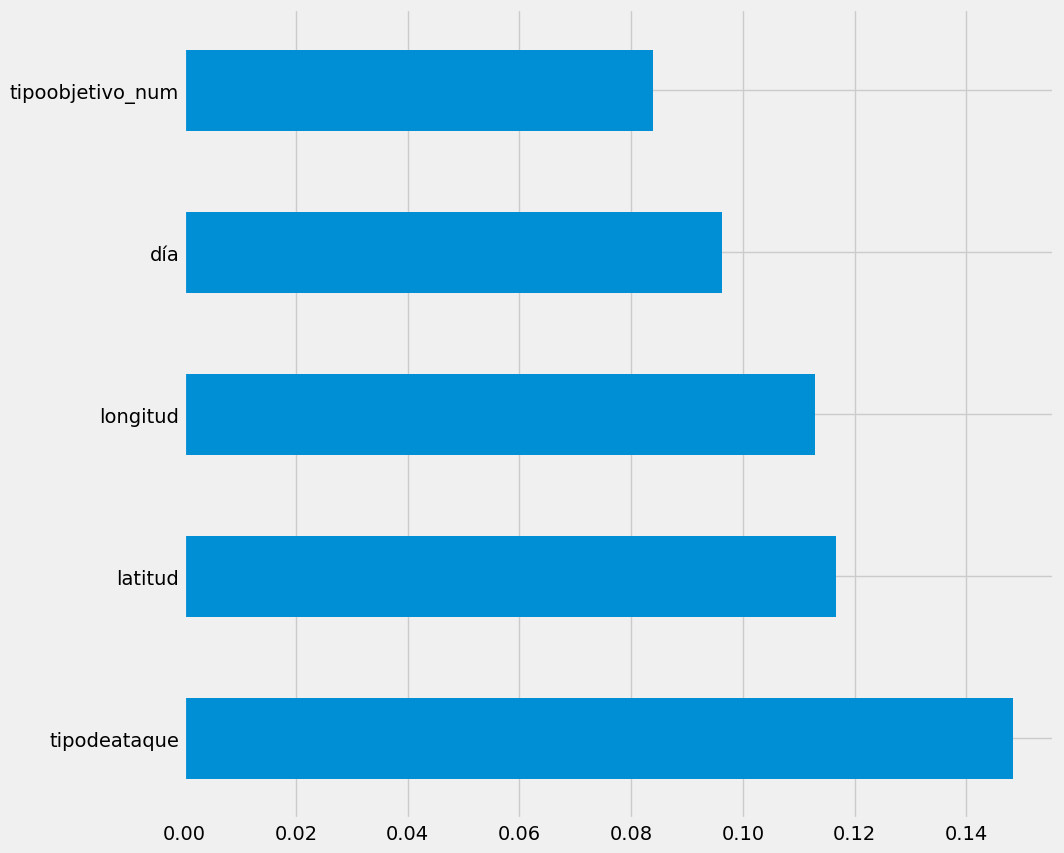

In [26]:
# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train_RF.columns)
feat_importances = feat_importances.nlargest(5)
feat_importances.plot(kind='barh' , figsize=(10,10))

[0.07734789 0.09628775 0.05012918 0.1166555  0.11296914 0.00290951
 0.01347099 0.01627845 0.14827995 0.08385109 0.04468793 0.0109309
 0.03583663 0.05379526 0.02624575 0.02542358 0.01779859 0.00073642
 0.06636548]


<Axes: >

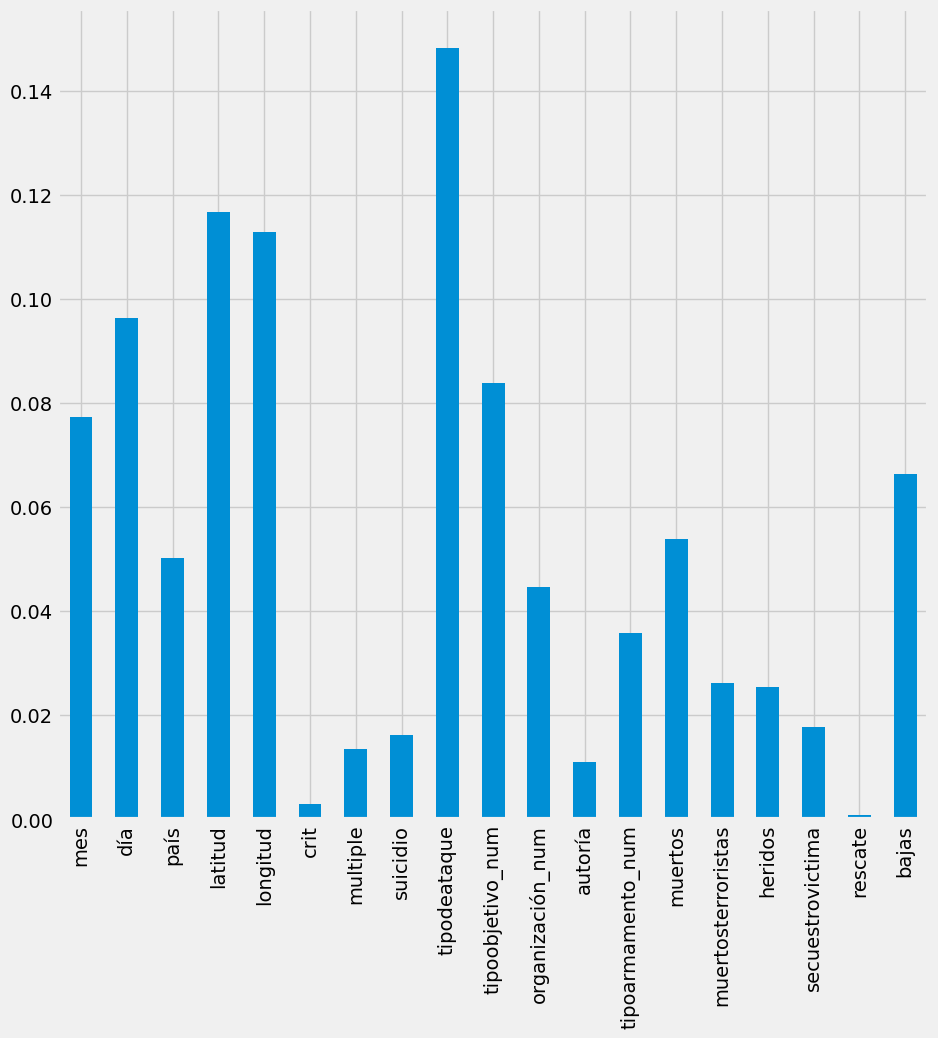

In [27]:
# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train_RF.columns)
feat_importances = feat_importances
feat_importances.plot(kind='bar' , figsize=(10,10))

In [28]:
indices = np.argsort(importances)[::-1]
from sklearn.tree import export_graphviz
estimator = clf.estimators_[1] # number of trees to visualise
# Export as dot file
export_graphviz(estimator, out_file='RandomForest.dot',
                feature_names = X_train_RF.columns,
                #class_names = y_train.columns,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# file will be saved in current working directory
for f in range(X.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. Variable %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print ("Nombre de la variable: ", X.columns[indices[f]])

1. Variable 8 (0.148280)
Nombre de la variable:  tipodeataque
2. Variable 3 (0.116655)
Nombre de la variable:  latitud
3. Variable 4 (0.112969)
Nombre de la variable:  longitud
4. Variable 1 (0.096288)
Nombre de la variable:  día
5. Variable 9 (0.083851)
Nombre de la variable:  tipoobjetivo_num
6. Variable 0 (0.077348)
Nombre de la variable:  mes
7. Variable 18 (0.066365)
Nombre de la variable:  bajas
8. Variable 13 (0.053795)
Nombre de la variable:  muertos
9. Variable 2 (0.050129)
Nombre de la variable:  país
10. Variable 10 (0.044688)
Nombre de la variable:  organización_num
11. Variable 12 (0.035837)
Nombre de la variable:  tipoarmamento_num
12. Variable 14 (0.026246)
Nombre de la variable:  muertosterroristas
13. Variable 15 (0.025424)
Nombre de la variable:  heridos
14. Variable 16 (0.017799)
Nombre de la variable:  secuestrovictima
15. Variable 7 (0.016278)
Nombre de la variable:  suicidio
16. Variable 6 (0.013471)
Nombre de la variable:  multiple
17. Variable 11 (0.010931)
Nomb

In [29]:
# use the model to make predictions with the test data
y_pred_RF = clf.predict(X_test_RF)

In [30]:
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions_RF = pd.DataFrame({'Actual':y_test_RF, 'predictions':y_pred_RF})

In [31]:
final_model_predictions_RF.head()

,Actual,predictions
año,,
1992,1,1
2010,1,1
2017,1,1
1983,1,1
2013,1,1


Como de bien funciona el modelo

In [32]:
# how did our model perform?
count_misclassified = (y_test_RF != y_pred_RF).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
print('Accuracy: {:.4f}'.format(accuracy_RF))

Misclassified samples: 355
Accuracy: 0.9441


In [33]:
y_pred_prob = clf.predict_proba(X_test_RF)  # 2  columns for probability it is creating
y_pred_prob = clf.predict_proba(X_test_RF)[:,1]   # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1
final_model_predictions_RF['Predicted_prob'] = y_pred_prob
final_model_predictions_RF.head()

,Actual,predictions,Predicted_prob
año,,,
1992,1,1,0.990
2010,1,1,0.975
2017,1,1,0.997
1983,1,1,0.992
2013,1,1,0.857


In [34]:
!pip install pyqt5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.5 MB/s eta 0:00:00


In [35]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [36]:
import csv
import numpy as np
from sklearn.svm import SVR
import seaborn as sn
import matplotlib

import matplotlib.pyplot as plt



In [38]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # correct 0 is sensitivity and correct is specificity

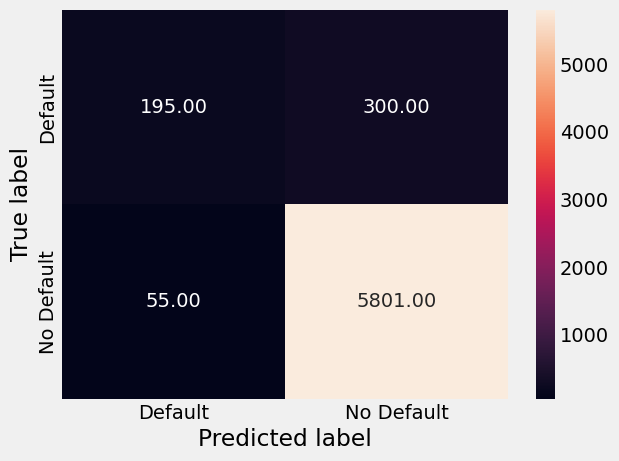

In [39]:
draw_cm( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )   # correct 0 is sensitivity and correct is spe

In [40]:
accuracy_RF=np.round( metrics.accuracy_score( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions  ),2)*100
accuracy_RF='{:.2f}'.format(accuracy_RF)
print( 'Total Accuracy : ',accuracy_RF )
recall_RF=metrics.recall_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('recall :',recall_RF)
precision_RF=metrics.precision_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('Precision :',precision_RF)

Total Accuracy :  94.00
recall : 0.9906079234972678
Precision : 0.9508277331584986


In [41]:
cm1 = metrics.confusion_matrix( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.39
Specificity :  0.99


<Axes: xlabel='Predicted_prob'>

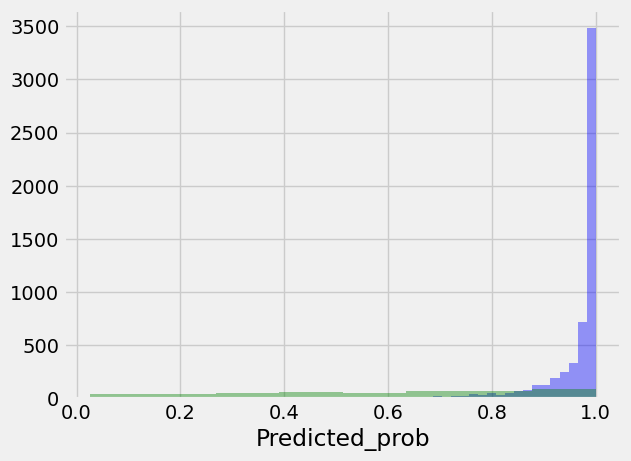

In [42]:
sn.distplot( final_model_predictions_RF[final_model_predictions_RF.Actual == 1]["Predicted_prob"], kde=False, color = 'b' )
sn.distplot( final_model_predictions_RF[final_model_predictions_RF.Actual == 0]["Predicted_prob"], kde=False, color = 'g' )


In [43]:
auc_score = metrics.roc_auc_score( final_model_predictions_RF.Actual, final_model_predictions_RF.Predicted_prob  )
round( float( auc_score ), 2 )

0.93

In [44]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

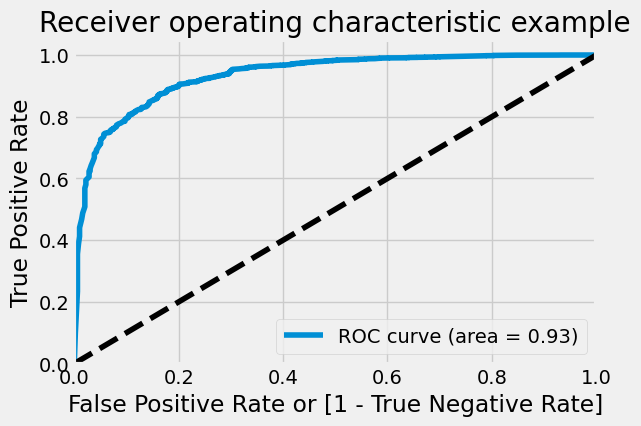

In [45]:
fpr, tpr, thresholds = draw_roc( final_model_predictions_RF.Actual, final_model_predictions_RF.Predicted_prob )

In [47]:
columns=["Accuracy", "recall", "Precision "]

# K-Nearest Neighbors Algorithm

In [46]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_KNN)

X_train_knn = scaler.transform(X_train_KNN)
X_test_knn = scaler.transform(X_test_KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_knn, y_train_KNN)

KNeighborsClassifier(n_neighbors=2)

In [49]:
y_pred_knn = classifier.predict(X_test_knn)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_KNN, y_pred_knn))
print(classification_report(y_test_KNN, y_pred_knn))

[[ 171  324]
 [ 711 5145]]
              precision    recall  f1-score   support

           0       0.19      0.35      0.25       495
           1       0.94      0.88      0.91      5856

    accuracy                           0.84      6351
   macro avg       0.57      0.61      0.58      6351
weighted avg       0.88      0.84      0.86      6351



In [51]:
final_model_predictions_knn = pd.DataFrame({'Actual':y_test_KNN, 'predictions':y_pred_knn})

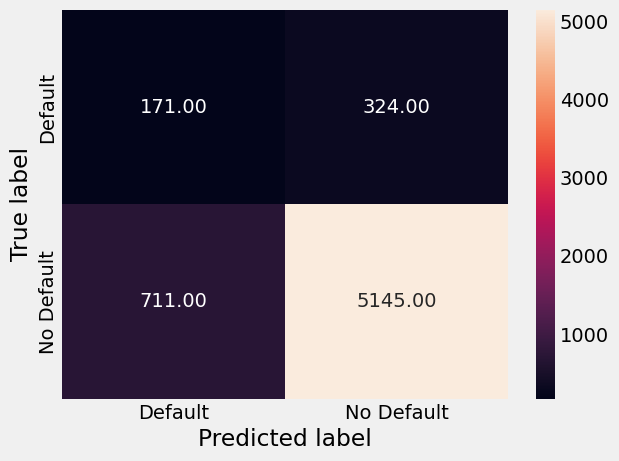

In [52]:
draw_cm( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )   # correct 0 is sensitivity and correct is specificity


In [53]:
accuracy_knn=metrics.accuracy_score( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)*100
accuracy_knn='{:.2f}'.format(accuracy_knn)
print( 'Total Accuracy : ',accuracy_knn)
recall_knn=metrics.recall_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('recall',recall_knn)
Precision_knn=metrics.precision_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('Precision',Precision_knn)

Total Accuracy :  83.70
recall 0.8785860655737705
Precision 0.9407569939659901


In [54]:
cm2 = metrics.confusion_matrix( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)

sensitivity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.35
Specificity :  0.88


In [55]:
rows_knn=pd.DataFrame({"Algorithm":['Random Forest','K-Nearest Neighbors Algorithm'],"Accuracy":[accuracy_RF,accuracy_knn],"Recall":[recall_RF,recall_knn],"Precision ":[precision_RF,Precision_knn]})
rows_knn

,Algorithm,Accuracy,Recall,Precision
0,Random Forest,94.00,0.990608,0.950828
1,K-Nearest Neighbors Algorithm,83.70,0.878586,0.940757


# Linear Regression

In [56]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [58]:
lin_reg.fit(X_train_lr,y_train_lr)

LinearRegression()

In [59]:
y_pred_lr=lin_reg.predict(X_test_lr)

In [60]:
y_pred_lr

array([0.93360287, 0.91786987, 0.92651791, ..., 0.90736443, 0.91301676,
       0.91214305])

In [61]:
y_pred_lrr=y_pred_lr.round()

In [62]:
final_model_predictions_lr = pd.DataFrame({'Actual':y_test_lr, 'predictions':y_pred_lrr})

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_lr, y_pred_lrr))
print(classification_report(y_test_lr, y_pred_lrr))

[[   0  495    0    0    0]
 [   0 5851    3    1    1]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       495
         1.0       0.92      1.00      0.96      5856
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0

    accuracy                           0.92      6351
   macro avg       0.18      0.20      0.19      6351
weighted avg       0.85      0.92      0.88      6351



In [64]:
accuracy_lr=metrics.accuracy_score( final_model_predictions_lr.Actual, final_model_predictions_lr.predictions  )*100
accuracy_lr='{:.2f}'.format(accuracy_lr)
print( 'Total Accuracy : ',accuracy_lr)
recall_lr=metrics.recall_score(final_model_predictions_lr.Actual, final_model_predictions_lr.predictions,average='micro' )
print('recall',recall_lr)
Precision_lr=metrics.precision_score(final_model_predictions_lr.Actual, final_model_predictions_lr.predictions,average='micro' )
print('Precision',Precision_lr)

Total Accuracy :  92.13
recall 0.9212722405920327
Precision 0.9212722405920327


In [65]:
rows_knn=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr],"Recall":[recall_RF,recall_knn,recall_lr],"Precision ":[precision_RF,Precision_knn,Precision_lr]},index=["Random Forest","KNN","Linear Regression"])
rows_knn

,Accuracy,Recall,Precision
Random Forest,94.00,0.990608,0.950828
KNN,83.70,0.878586,0.940757
Linear Regression,92.13,0.921272,0.921272


# Decision Tree Classifier

In [66]:
# import the regressor
from sklearn.tree import DecisionTreeClassifier

In [67]:
# create a regressor object
decision_Tree_Classifier = DecisionTreeClassifier (random_state = 0)

In [68]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [69]:
decision_Tree_Classifier.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(random_state=0)

In [70]:
# predicting a new value

# test the output by changing values, like 3750
y_pred_DT = decision_Tree_Classifier.predict(X_test_DT)

In [71]:
print(y_pred_DT)

[1 1 1 ... 1 1 1]


In [72]:
final_model_predictions_DT = pd.DataFrame({'Actual':y_test_DT, 'predictions':y_pred_DT})

In [73]:
final_model_predictions_DT.head()

,Actual,predictions
año,,
1992,1,1
2010,1,1
2017,1,1
1983,1,1
2013,1,1


In [74]:
# how did our model perform?
count_misclassified = (y_test_DT != y_pred_DT).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_DT = np.round(metrics.accuracy_score(y_test_DT, y_pred_DT),1)*100
print( 'Total Accuracy : ',accuracy_DT)

Misclassified samples: 458
Total Accuracy :  90.0


In [75]:
print(confusion_matrix(y_test_DT, y_pred_DT))
print(classification_report(y_test_DT, y_pred_DT))

[[ 251  244]
 [ 214 5642]]
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       495
           1       0.96      0.96      0.96      5856

    accuracy                           0.93      6351
   macro avg       0.75      0.74      0.74      6351
weighted avg       0.93      0.93      0.93      6351



In [76]:
accuracy_DT=np.round( metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions  ),1)*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT)
recall_DT=metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('recall',recall_DT)
Precision_DT=metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('Precision',Precision_DT)

Total Accuracy :  90.00
recall 0.927885372382302
Precision 0.927885372382302


In [77]:
table_DT=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT],
                       "Recall":[recall_RF,recall_knn,recall_lr,recall_DT],
                       "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT]},
                      index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier"])
table_DT

,Accuracy,Recall,Precision
Random Forest,94.00,0.990608,0.950828
KNN,83.70,0.878586,0.940757
Linear Regression,92.13,0.921272,0.921272
Decision Tree Classifier,90.00,0.927885,0.927885


# Support Vector Classifier

In [79]:
x_svm=X.head(100)
y_svm=Y.head(100)
#support vector classifier works slow for large data sets. hence it is trimmed

In [80]:
X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = train_test_split( x_svm, y_svm, test_size = 0.3, random_state = 100)

In [81]:
from sklearn.svm import SVC # "Support Vector Classifier"
clfsvm = SVC(kernel='linear')

In [ ]:
# fitting x samples and y classes
clfsvm.fit(X_train_SVC,y_train_SVC)

In [ ]:
y_pred_SVC=clfsvm.predict(X_test_SVC)

In [ ]:
final_model_predictions_SVC = pd.DataFrame({'Actual':y_test_SVC, 'predictions':y_pred_SVC})

In [ ]:
# how did our model perform?
count_misclassified = (y_test_SVC != y_pred_SVC).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_SVC = metrics.accuracy_score(y_test_SVC, y_pred_SVC)
print('Accuracy: {:.2f}'.format(accuracy_SVC))

In [ ]:
print(confusion_matrix(y_test_SVC, y_pred_SVC))
print(classification_report(y_test_SVC, y_pred_SVC))
print("-----------------------------------------------------------------------------------------------------------------------")

print("-----------------------------------------------------------------------------------------------------------------------")
accuracy_SVC=metrics.accuracy_score( final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions  )*100
accuracy_SVC='{:.2f}'.format(accuracy_SVC)
print( 'Total Accuracy : ',accuracy_SVC)
recall_SVC=metrics.recall_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('recall',recall_SVC)
Precision_SVC=metrics.precision_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('Precision',Precision_SVC)

In [ ]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT,accuracy_SVC],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_DT,recall_SVC],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT,Precision_SVC]},
                   index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier","Support Vector Classifier"])
table

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [80]:
logmodel = LogisticRegression()
logmodel.fit(X_train_LR, y_train_LR)

LogisticRegression()

In [81]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [82]:
predictions_LR = logmodel.predict(X_test_LR)

In [83]:
predictions_LR

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
final_model_predictions_LR = pd.DataFrame({'Actual':y_test_LR, 'predictions':predictions_LR})

In [85]:
count_misclassified = (y_test_LR != predictions_LR).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_LR, predictions_LR)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 717
Accuracy: 0.89


In [86]:
print(confusion_matrix(y_test_LR, predictions_LR))
print(classification_report(y_test_LR, predictions_LR))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_LR=np.round(metrics.accuracy_score( final_model_predictions_LR.Actual, final_model_predictions_LR.predictions ),2 )*100
accuracy_LR='{:.2f}'.format(accuracy_LR)
print( 'Total Accuracy : ',accuracy_LR)
recall_LR=metrics.recall_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('Precision',Precision_LR)

[[  23  472]
 [ 245 5611]]
              precision    recall  f1-score   support

           0       0.09      0.05      0.06       495
           1       0.92      0.96      0.94      5856

    accuracy                           0.89      6351
   macro avg       0.50      0.50      0.50      6351
weighted avg       0.86      0.89      0.87      6351

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  89.00
recall 0.8871043930089749
Precision 0.8871043930089749


In [88]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_DT,recall_LR],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT,Precision_LR]},
                   index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier","Logistic Regression"])
table


,Accuracy,Recall,Precision
Random Forest,94.00,0.990608,0.950828
KNN,83.70,0.878586,0.940757
Linear Regression,92.13,0.921272,0.921272
Decision Tree Classifier,90.00,0.927885,0.927885
Logistic Regression,89.00,0.887104,0.887104


# Linear Discriminant Analysis

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [90]:
clf_LDA = LinearDiscriminantAnalysis()

In [91]:
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [92]:
clf_LDA.fit(X_train_LDA, y_train_LDA)

LinearDiscriminantAnalysis()

In [93]:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis()

In [94]:
predictions_LDA = clf_LDA.predict(X_test_LDA)

In [95]:
final_model_predictions_LDA = pd.DataFrame({'Actual':y_test_LDA, 'predictions':predictions_LDA})

In [96]:
count_misclassified = (y_test_LDA != predictions_LDA).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_LDA = metrics.accuracy_score(y_test_LDA, predictions_LDA)
accuracy_LDA='{:.4f}'.format(accuracy)
accuracy_LDA = float(accuracy_LDA)*100

Misclassified samples: 495


In [99]:
print(confusion_matrix(y_test_LDA, predictions_LDA))
print(classification_report(y_test_LDA, predictions_LDA))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")

print( 'Total Accuracy : ',accuracy_LDA)
recall_LDA=metrics.recall_score(final_model_predictions_LDA.Actual, final_model_predictions_LDA.predictions,average='micro' )
print('recall',recall_LDA)
Precision_LDA=metrics.precision_score(final_model_predictions_LDA.Actual, final_model_predictions_LDA.predictions,average='micro' )
print('Precision',Precision_LDA)

[[   0  495]
 [   0 5856]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       495
           1       0.92      1.00      0.96      5856

    accuracy                           0.92      6351
   macro avg       0.46      0.50      0.48      6351
weighted avg       0.85      0.92      0.88      6351

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  88.71
recall 0.9220595181861124
Precision 0.9220595181861124


In [100]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_LDA,accuracy_DT,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_LDA,recall_DT,recall_LR,],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_LDA,Precision_DT,Precision_LR]},
                   index=["Random Forest","K-Nearest Neighbors Algorithm","Linear Regression","Linear Discriminant Analysis","Decision Tree Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,94.00,0.990608,0.950828
K-Nearest Neighbors Algorithm,83.70,0.878586,0.940757
Linear Regression,92.13,0.921272,0.921272
Linear Discriminant Analysis,88.71,0.922060,0.922060
Decision Tree Classifier,90.00,0.927885,0.927885
Logistic Regression,89.00,0.887104,0.887104


# Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [103]:
gnb = GaussianNB()

In [104]:
gnb.fit(X_train_NB, y_train_NB)

GaussianNB()

In [105]:
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [106]:
y_pred_NB=gnb.predict(X_test_NB)

In [107]:
final_model_predictions_NB = pd.DataFrame({'Actual':y_test_NB, 'predictions':y_pred_NB})

In [108]:
count_misclassified = (y_test_NB != y_pred_NB).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_NB = metrics.accuracy_score(y_test_NB, y_pred_NB)
accuracy_NB='{:.3f}'.format(accuracy_NB)
accuracy_NB = float(accuracy_NB)*100

Misclassified samples: 495


In [109]:
print(confusion_matrix(y_test_NB, y_pred_NB))
print(classification_report(y_test_NB, y_pred_NB))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_NB='{:.2f}'.format(accuracy_NB)
print( 'Total Accuracy : ',accuracy_NB)
recall_NB=metrics.recall_score(final_model_predictions_NB.Actual, final_model_predictions_NB.predictions,average='micro' )
print('recall',recall_NB)
Precision_NB=metrics.precision_score(final_model_predictions_NB.Actual, final_model_predictions_NB.predictions,average='micro' )
print('Precision',Precision_NB)

[[   0  495]
 [   0 5856]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       495
           1       0.92      1.00      0.96      5856

    accuracy                           0.92      6351
   macro avg       0.46      0.50      0.48      6351
weighted avg       0.85      0.92      0.88      6351

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  92.20
recall 0.9220595181861124
Precision 0.9220595181861124


In [111]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_LDA,accuracy_DT,accuracy_NB,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_LDA,recall_DT,recall_NB,recall_LR,],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_LDA,Precision_DT,Precision_NB,Precision_LR]},
                   index=["Random Forest","K-Nearest Neighbors Algorithm","Linear Regression","Linear Discriminant Analysis","Decision Tree Classifier","Naive Bayes","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,94.00,0.990608,0.950828
K-Nearest Neighbors Algorithm,83.70,0.878586,0.940757
Linear Regression,92.13,0.921272,0.921272
Linear Discriminant Analysis,88.71,0.922060,0.922060
Decision Tree Classifier,90.00,0.927885,0.927885
Naive Bayes,92.20,0.922060,0.922060
Logistic Regression,89.00,0.887104,0.887104
